<a href="https://colab.research.google.com/github/hugofq/Premium-Water/blob/main/Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify
#!pip install openpyxl==3.0.9

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
import plotly.express as px

pd.options.display.float_format = "{:}".format # Para mostrar toda la longitud de los float

In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/Trabajo Grupal/UTEC - Advanced Analytics & AI - Dataset Caso Grupal Analytics.xlsx', sheet_name = 'Database', header = 6 )

In [ ]:
print(f'En la base hay {df.shape[0]:,.2f} filas y {df.shape[1]} columnas. Las variables identificadoras son el Codigo Grupo y el periodo.Hay data real y presupuestada') 

En la base hay 25,496.00 filas y 57 columnas. Las variables identificadoras son el Codigo Grupo y el periodo.Hay data real y presupuestada


# Calidad de información

In [ ]:
# Dividimos la data entre real y presupuestada y eliminanos las notas de credito porque no son transacciones concluidas

df_real = df.loc[ (df['REAL_PPTO'] == 'REAL') & (df['Cantidad'] >= 0) ]
df_ppto = df.loc[ (df['REAL_PPTO'] == 'Presupuesto') &  (df['Cantidad'] >= 0) ]


## ¿Cuáles son las conclusiones generales sobre la calidad de la información?

### Missing values
Revisamos si existen valores nulos en algunas variables importantes

In [ ]:
df_real.shape

(14497, 57)

In [ ]:
df_real.isnull().sum()

Documento                1730
Tipo producto               0
#SAP                     1730
Estado                   1730
Sub-tipo                 1730
Tipo SUNAT               1730
Serie                    1730
Correlativo              1730
Periodo                     0
Fecha emisión               0
Fecha creación           1730
Razón social cliente        0
Co-Distribuidor          1730
Condición de pago        1730
Fecha venc               1730
Vendedor SN              1730
Canal                       0
Bodega                      2
Marca                       2
Familia                  1730
Sub-Familia              1730
Inv                      1730
Grupo                       0
Código                      0
Cod. Padre              13248
Descripción                 0
Lista Precios S/N        5244
Moneda                   1730
TC                       1730
Cantidad                    0
Almacén                  1730
Prec.Unit                1730
%Desc.Item               1730
%Desc.Docu

### Creacion de variables adicionales

Se convirtio el precio a soles porque inicialmente este estaba en dolares y permitia hacer una comparacion con el costo

In [ ]:
my_dfs = [df_real, df_ppto]

for dfs in my_dfs:

  # Convierto el precio de $ a S/
  precios = ['Prec.Unit', 'Prec.-Desc.', 'Prec.Total', 'Prec.Total-Anticipo', 'Total', 'Total+Percepcion']  
  for p in precios:
    dfs[f'{p} S/'] = dfs[f'{p}']*dfs['TC']
    dfs[f'{p} S/'] = dfs[f'{p}']*dfs['TC']

  # Calculo los margenes de ganancia
  dfs['Margen Unitario'] = dfs['Prec.Unit S/'] - dfs['Costo Unit']
  dfs['Margen Unitario dsct'] = dfs['Prec.-Desc. S/'] - dfs['Costo Unit']
  dfs['Utilidad'] = dfs['Total+Percepcion S/'] - dfs['Costo Total']

  # Calculo el mes
  new = dfs["Periodo"].str.split("-", n = 1, expand = True)  
  dfs["Anio"]= new[0]
  dfs["Mes"]= new[1]


#Calculo un % de descuento en el precio
#df['% Descuento Precio'] = (df['Prec.Unit S/'] - df['Prec.-Desc. S/'])/df['Prec.Unit S/']

# Genero una copia de la base sin los datos negativos
df_copy = df.copy()
df_copy = df_copy[ (df_copy['Cantidad'] >= 0) & (df_copy['Prec.Unit'] > 0) ]
df_copy_split = dfs["Periodo"].str.split("-", n = 1, expand = True)  
df_copy["Anio"]= new[0]
df_copy["Mes"]= new[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df_real.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#SAP,12767.0,1805420093.0762904,2759522.480558725,1801010007.0,1803010689.0,1805012015.0,1808010363.0,1810010784.0
Correlativo,12767.0,6318.182345108483,4233.626158570541,1.0,2469.0,6067.0,9926.5,122348.0
TC,12767.0,3.2667508420147233,0.031930774679722426,3.208,3.243,3.27,3.287,3.335
Cantidad,14497.0,49.231703110988484,99.01723699492658,0.0,6.0,24.0,48.0,4000.0
Almacén,12767.0,18.9560585885486,99.55281036442892,1.0,1.0,1.0,1.0,609.0
Prec.Unit,12767.0,1.8332674567243916,0.7535241237589685,0.475015,1.544237,1.6,1.796105,16.1017
%Desc.Item,12767.0,34.729092965456985,7.438247073234315,0.0,33.0,33.0,33.000008,88.200137
%Desc.Documento,12767.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%Desc.ListaPrecios,9256.0,30.85901037165082,8.81242804284148,0.0,33.0,33.0,33.0,45.0
Prec.-Desc.,12767.0,1.1990548854859813,0.5305217757622744,0.222116,0.970593,1.072,1.20339,10.788139


Se podria decir que **la calidad de la informacion brindada fue buena**.

## ¿Existe consistencia en los datos de costos, precios y descuentos aplicados?

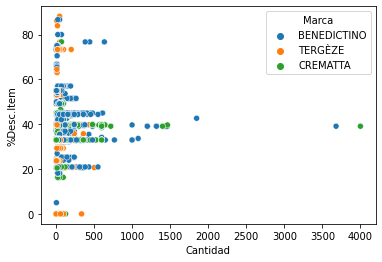

In [ ]:
#No hay una relacion entre descuento de precio por cantidad, por que? De hecho hay mucha varianza para el descuento del 40%
sns.scatterplot(x="Cantidad", y="%Desc.Item", hue="Marca", data=df_real)

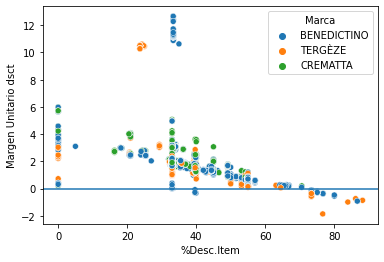

In [ ]:
# El margen de ganancia unitaria llega a ser negativo alrededor de un descuento de 75%
graph1 = sns.scatterplot(x="%Desc.Item", y="Margen Unitario dsct", hue="Marca", data=df_real)
graph1.axhline(0)

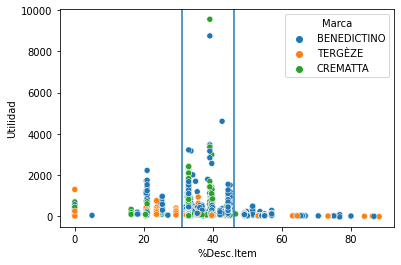

In [ ]:
# Los descuentos entre el 30% y el 50% son los que dan mayor utilidad
graph2 = sns.scatterplot(x="%Desc.Item", y="Utilidad", hue="Marca", data=df_real)
graph2.axvline(31)
graph2.axvline(46)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


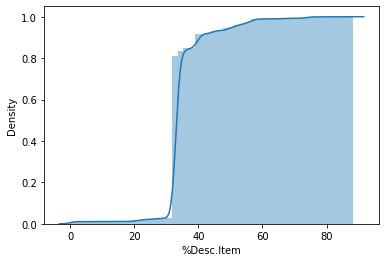

In [ ]:
freq_dsct = pd.value_counts(df_real['%Desc.Item']).to_frame().reset_index()
freq_dsct
kwargs = {'cumulative': True}
sns.distplot(df_real['%Desc.Item'], hist_kws=kwargs, kde_kws=kwargs)

## ¿Qué se puede concluir sobre las variables ‘costos’ y ‘cantidad’?

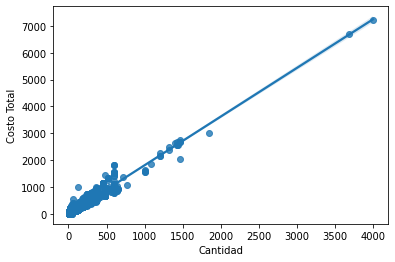

In [ ]:
sns.regplot(x="Cantidad", y="Costo Total", data=df_real)

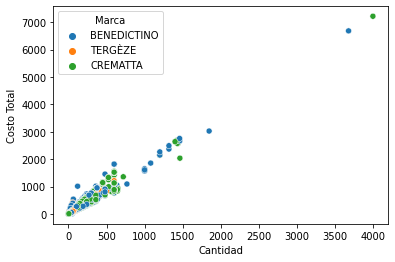

In [ ]:
# Los costos totales aumentan con la cantidad
sns.scatterplot(x="Cantidad", y="Costo Total", hue="Marca", data=df_real)

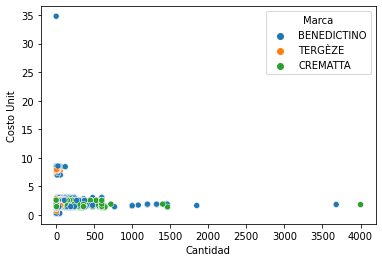

In [ ]:
# Los costos unitario se mantienen constantes respecto a la cantidad ofertada
sns.scatterplot(x="Cantidad", y="Costo Unit", hue="Marca", data=df_real)

## ¿La data es lo suficientemente consistente como para obtener conclusiones relevantes para la campaña navideña?

Si, los datos son consistentes

# Portafolio

## ¿Cuáles son los grupos de productos que concentran la mayor venta?

In [ ]:
df_sku = df_real.groupby(['Código','Descripción'],as_index = False)['Utilidad', 'Total+Percepcion S/', 'Costo Total'].sum().round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
#Top 5 utilidad
df_sku.sort_values('Utilidad',kind='mergesort',ascending=False, inplace=True)
sku_top_util = df_sku.head(5).style.format({"Utilidad": "S/{:20,.0f}", 
                          "Total+Percepcion S/": "S/{:20,.0f}", 
                          "Costo Total" : "S/{:20,.0f}"})
sku_top_util.to_excel('sku_top_util.xlsx')
sku_top_util

,Código,Descripción,Utilidad,Total+Percepcion S/,Costo Total
2,AG300004,CREMATTA AGUA MINERAL SIN GAS GLASS 750ML,"S/ 299,448","S/ 484,587","S/ 185,139"
12,AG300016,CREMATTA AGUA MINERAL SIN GAS GLASS 505ML,"S/ 234,931","S/ 395,623","S/ 160,692"
10,AG300010,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 750ML,"S/ 215,681","S/ 349,270","S/ 133,589"
13,AG300017,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 505ML,"S/ 211,583","S/ 357,263","S/ 145,680"
0,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,"S/ 145,121","S/ 245,224","S/ 100,103"


In [ ]:
#Top 5 ingresos
df_sku.sort_values('Total+Percepcion S/',kind='mergesort',ascending=False, inplace=True)
df_sku.head(5).style.format({"Utilidad": "S/{:20,.0f}", 
                          "Total+Percepcion S/": "S/{:20,.0f}", 
                          "Costo Total" : "S/{:20,.0f}"})

In [ ]:
#Top 5 costos
df_sku.sort_values('Costo Total',kind='mergesort',ascending=False, inplace=True)
df_sku.head(5).style.format({"Utilidad": "S/{:20,.0f}", 
                          "Total+Percepcion S/": "S/{:20,.0f}", 
                          "Costo Total" : "S/{:20,.0f}"})

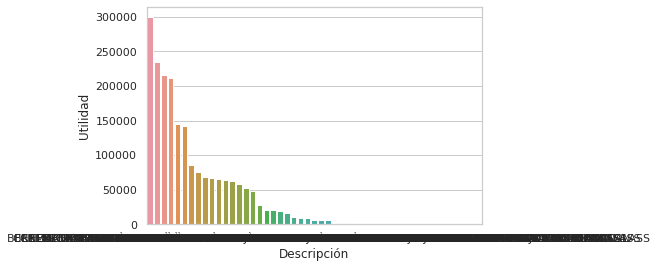

In [ ]:
# Distribucion de la utilidad por SKU
df_sku_plt = df_sku.reset_index().sort_values('Utilidad', ascending = False )
sns.barplot(x = 'Descripción',
            y = 'Utilidad',
            data = df_sku_plt)

## Si se tuviera que elegir 5 SKUs en base a su aporte combinado venta margen, ¿cuáles serían?

In [ ]:
df_sku_mean = df_real.groupby(['Código','Descripción'],as_index = False)['Margen Unitario', 'Prec.Unit S/', 'Costo Unit'].mean().round(decimals = 2)
df_sku_mean['Margen%'] = (df_sku_mean['Prec.Unit S/'] - df_sku_mean['Costo Unit'])*100/df_sku_mean['Prec.Unit S/'] 
df_sku_mean.sort_values(by='Margen%', kind='mergesort',ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
top_sku_margen = df_sku_mean.head(5).style.format({"Margen Unitario": "S/{:20,.0f}", 
                          "Prec.Unit S/": "S/{:20,.2f}", 
                          "Costo Unit" : "S/{:20,.2f}",
                          "Margen%" : "{:20,.2f}%"})
top_sku_margen.to_excel('top_sku_margen.xlsx')

## ¿Qué se podría concluir sobre la amplitud y profundidad del portafolio? ¿Lo consideras completo? ¿Prescindirías de algún SKU? ¿Por qué?

In [ ]:
df_real_nm = df_real.dropna(subset=['Familia', 'Sub-Familia','Marca'])

In [ ]:
# Amplitud
fig = px.treemap(df_real_nm, 
                 path=['Marca','Familia', 'Sub-Familia'], 
                 values='Utilidad',
                 color='CANTIDAD',
                 color_continuous_scale='RdBu'
                )
fig.show()

In [ ]:
# Amplitud
fig = px.treemap(df_real_nm, 
                 path=['Marca','Familia', 'Sub-Familia'], 
                 values='Utilidad',
                 color_continuous_scale='RdBu'
                )
fig.show()

In [ ]:
# Profundidad
fig = px.treemap(df_real_nm, 
                 path=['Marca','Familia', 'Descripción'], 
                 values='Utilidad',
                 color='CANTIDAD',
                 color_continuous_scale='RdBu'
                )
fig.show()

In [ ]:
# Profundidad
fig = px.treemap(df_real_nm, 
                 path=['Marca','Familia', 'Descripción'], 
                 values='Utilidad',
                 color_continuous_scale='RdBu'
                )
fig.show()

In [ ]:
# Exploracion de la cartera ¿Prescindirías de algún SKU? ¿Por qué?
fig = px.treemap(df_real_nm, 
                 path=['Familia','Sub-Familia', 'Marca'], 
                 values='CANTIDAD',
                 color='Utilidad',
                 color_continuous_scale='RdBu'
                )
fig.show()

In [ ]:
# ¿Cuáles canales de venta son los más relevantes para la categoría? 
fig = px.treemap(df_real_nm, 
                 path=['NUEVO CANAL','Sub-Familia'], 
                 values='Utilidad'
                )
fig.show()

# Pricing 

## **¿Qué SKU parece ser el más/menos elástico a la demanda?**

In [ ]:
# Calculo los SKUs
skus_list = df_real['Codigo Grupo'].unique().tolist()

In [ ]:
# Genero un data frames para cada SKU
list_skus_dfs = []
for sku in skus_list:
  df_sku = df_real.loc[df_real['Codigo Grupo'] == sku ]
  list_skus_dfs.append(df_sku)

dict_skus_df = dict(zip(skus_list,list_skus_dfs))

In [ ]:
# Calculo la longitud de los skus y elimino los menores a 30
for key in list(dict_skus_df):
  print('SKU:',key,
        '-> Producto:', dict_skus_df[key]['Descripcion Grupo'].unique(),
        '-> Rows:', dict_skus_df[key].shape[0])
  if dict_skus_df[key].shape[0]<=600:
    dict_skus_df.pop(key)
    print('Too small series')
  else:
    print('Is ok')

SKU: AG310011 -> Producto: ['BENEDICTINO ARANCIATA NARANJA CAN 330ML'] -> Rows: 865
Is ok
SKU: AG310014 -> Producto: ['BENEDICTINO LIMONATA LIMON CAN 330ML'] -> Rows: 604
Is ok
SKU: AG310015 -> Producto: ['BENEDICTINO CLEMENTINA GASIFICADA CAN 330ML'] -> Rows: 750
Is ok
SKU: AG300010 -> Producto: ['BENEDICTINO AGUA MINERAL GASIFICADA GLASS 750ML'] -> Rows: 1109
Is ok
SKU: AG310017 -> Producto: ['BENEDICTINO LIMONE E MENTA GASIFICADA CAN 330ML'] -> Rows: 391
Too small series
SKU: AG310018 -> Producto: ['BENEDICTINO FICODINDIA E ARANCIA GASIFICADA CAN 330ML'] -> Rows: 471
Too small series
SKU: AG310016 -> Producto: ['BENEDICTINO MELOGRANO E ARANCIA GASIFICADA CAN 330ML'] -> Rows: 773
Is ok
SKU: AG300027 -> Producto: ['TERGÈZE AGUA MINERAL GASIFICADA CAN 250ML - LIMON'] -> Rows: 156
Too small series
SKU: AG300004 -> Producto: ['CREMATTA AGUA MINERAL SIN GAS GLASS 750ML'] -> Rows: 1050
Is ok
SKU: AG310012 -> Producto: ['BENEDICTINO AGUA TONICA CAN 330ML'] -> Rows: 449
Too small series
SKU:

In [ ]:
# Calculo las elasticidades
elasticidades = []

for sku in list(dict_skus_df):
  elast_df = dict_skus_df[sku].dropna(subset=['Prec.-Desc. S/','CANTIDAD'])
  
  # Train/Test split 
  X = elast_df['Prec.-Desc. S/'].values
  y = elast_df['CANTIDAD'].values

  n_samples = X.shape[0]
  X_ = np.c_[np.ones(n_samples), X]
  X_

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.30, random_state=100)

  # Training
  from sklearn.linear_model import LinearRegression
  linreg = LinearRegression(fit_intercept=False)
  linreg.fit(X_train, y_train)

  # Predict
  pred1 = linreg.predict(X_test)
  df_temp = pd.DataFrame({'Real': y_test, 'Predicho': pred1.reshape(-1)})

  # MAPE 
  df_temp['in_mape'] = np.abs((df_temp['Real']-df_temp['Predicho'])/df_temp['Real'])
  df_temp['in_mape'].mean()

  # Validacion
  from sklearn import metrics
  import numpy as np
  #print('MAE:', metrics.mean_absolute_error(y_test, pred1))
  #print('MSE:', metrics.mean_squared_error(y_test, pred1))
  #print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
  #print('MAPE:',df_temp['in_mape'].mean())

  # Elasticidad
  X_test[:,1]
  y_test
  elas1 = linreg.coef_[1]*(np.mean(X_test[:,1])/np.mean(y_test))
  elasticidades.append(elas1)

# Genero un resumen de las elasticidades
sku_list = list(dict_skus_df)
sku_desc_list = []
for key in list(dict_skus_df):
  des_sku = dict_skus_df[key]['Descripcion Grupo'].unique()
  sku_desc_list.append(des_sku[0])

sku_elast = {'SKU':sku_list,
             'Producto':sku_desc_list,
        'Elasticidad':elasticidades}
 
df_elast = pd.DataFrame(sku_elast)
df_elast

,SKU,Producto,Elasticidad
0,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,-2.0762043161044463
1,AG310014,BENEDICTINO LIMONATA LIMON CAN 330ML,-1.7814006147004873
2,AG310015,BENEDICTINO CLEMENTINA GASIFICADA CAN 330ML,-1.66013371238096
3,AG300010,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 750ML,-0.4829492772182772
4,AG310016,BENEDICTINO MELOGRANO E ARANCIA GASIFICADA CAN...,-1.579885737404879
5,AG300004,CREMATTA AGUA MINERAL SIN GAS GLASS 750ML,-0.04902071700429096
6,AG300008,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 250ML,-2.2604954907427937
7,AG310009,BENEDICTINO ARANCIATA ROSSA CAN 330ML,-0.6944609115308567
8,AG300016,CREMATTA AGUA MINERAL SIN GAS GLASS 505ML,-3.5332302302910743
9,AG300017,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 505ML,-4.771749054149192


In [ ]:
df_elast.sort_values('Elasticidad', ascending = False, inplace = True )
df_elast_ppt = df_elast.style.format({'Elasticidad': '{:20,.2f}'})\
              .hide_index()\
              .bar(subset=['Elasticidad'], color='lightgreen')
df_elast_ppt.to_excel('Elasticidades.xlsx')
df_elast_ppt

SKU,Producto,Elasticidad
AG300004,CREMATTA AGUA MINERAL SIN GAS GLASS 750ML,-0.05
AG300010,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 750ML,-0.48
AG310009,BENEDICTINO ARANCIATA ROSSA CAN 330ML,-0.69
AG310016,BENEDICTINO MELOGRANO E ARANCIA GASIFICADA CAN 330ML,-1.58
AG310015,BENEDICTINO CLEMENTINA GASIFICADA CAN 330ML,-1.66
AG310014,BENEDICTINO LIMONATA LIMON CAN 330ML,-1.78
AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,-2.08
AG300008,BENEDICTINO AGUA MINERAL GASIFICADA GLASS 250ML,-2.26
AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,-2.48
AG300016,CREMATTA AGUA MINERAL SIN GAS GLASS 505ML,-3.53


## ¿Existen meses con mayor/menor sensibilidad a los precios? ¿Para qué grupo de productos?

In [ ]:
df_sku_mes = df_real.groupby(['Código','Descripción','Mes','Familia','Sub-Familia','NUEVO CANAL'],as_index = False)['Prec.-Desc. S/'].mean().round(decimals = 2)

In [ ]:
df_sku_mes

,Código,Descripción,Mes,Familia,Sub-Familia,NUEVO CANAL,Prec.-Desc. S/
0,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,01,MINERAL,MINERAL,CLF,3.03
1,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,01,MINERAL,MINERAL,DIS,3.26
2,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,01,MINERAL,MINERAL,HRC,3.0
3,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,01,MINERAL,MINERAL,HRC-ILLY,3.03
4,AG300001,CREMATTA AGUA MINERAL SIN GAS GLASS 250ML,01,MINERAL,MINERAL,TDG,3.03
...,...,...,...,...,...,...,...
1201,AG310020,BENEDICTINO CHINOTTO GASIFICADA CAN 330ML,08,GASIFICADA,SABORIZADA,HRC,3.52
1202,AG310020,BENEDICTINO CHINOTTO GASIFICADA CAN 330ML,09,GASIFICADA,SABORIZADA,CLF,2.62
1203,AG310020,BENEDICTINO CHINOTTO GASIFICADA CAN 330ML,09,GASIFICADA,SABORIZADA,HRC,3.55
1204,AG310020,BENEDICTINO CHINOTTO GASIFICADA CAN 330ML,10,GASIFICADA,SABORIZADA,CLF,3.48


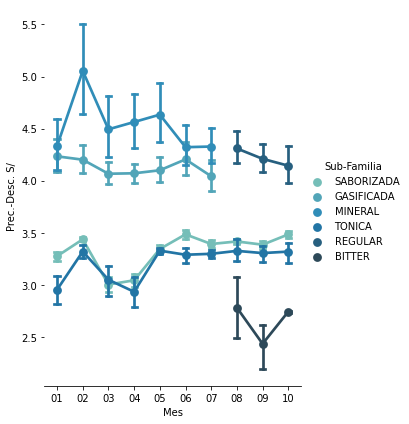

In [ ]:
sns.color_palette("Paired")
g = sns.catplot(x="Mes", y="Prec.-Desc. S/", hue="Sub-Familia",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df_real)
g.despine(left=True)

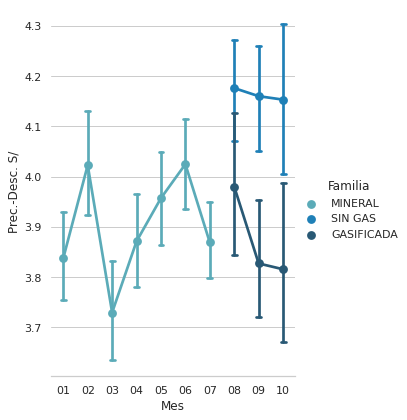

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="Mes", y="Prec.-Desc. S/", hue="Familia",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df_real)
g.despine(left=True)

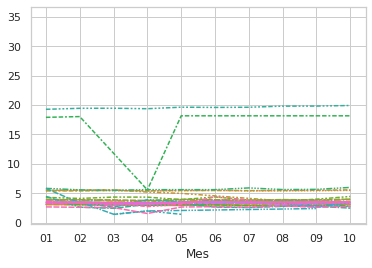

In [ ]:
df_sku_mes_col = df_sku_mes.pivot_table(index=['Mes'],columns='Código', values = 'Prec.-Desc. S/', aggfunc = 'mean')
sns.lineplot(data=df_sku_mes_col, legend = False)

## ¿Qué se puede concluir sobre la actual estrategia de pricing en general?

Es una estrategia basada en precios premium 

# Demand Forecasting
**Que mejoras se deben realizar a los modelos de estimacion de demanda**

## ¿Qué categorías tienen mayor desviación absoluta entre la venta estimada y la venta real (en unidades)?

In [ ]:
df_real_cant = df_real[['Código','Descripción','Familia','Sub-Familia','Mes','Cantidad']]
df_ppto_cant = df_ppto[['Código','Descripción','Familia','Sub-Familia','Mes','Cantidad']]
merge_dfs = pd.merge(df_real_cant, df_ppto_cant, on=["Código",'Mes'], how="inner", indicator=False, suffixes=('_real', '_ppto'))
merge_dfs['MAE'] = np.abs(merge_dfs['Cantidad_real'] - merge_dfs['Cantidad_ppto'])
merge_dfs['MAPE'] = np.abs(merge_dfs['Cantidad_real'] - merge_dfs['Cantidad_ppto'])/merge_dfs['Cantidad_real']
merge_dfs

,Código,Descripción_real,Familia_real,Sub-Familia_real,Mes,Cantidad_real,Descripción_ppto,Familia_ppto,Sub-Familia_ppto,Cantidad_ppto,MAE,MAPE
0,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,MINERAL,SABORIZADA,01,18.0,BENEDICTINO ARANCIATA NARANJA CAN 330ML,NaN,NaN,0.0,18.0,1.0
1,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,MINERAL,SABORIZADA,01,18.0,BENEDICTINO ARANCIATA NARANJA CAN 330ML,NaN,NaN,0.0,18.0,1.0
2,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,MINERAL,SABORIZADA,01,18.0,BENEDICTINO ARANCIATA NARANJA CAN 330ML,NaN,NaN,98.0,80.0,4.444444444444445
3,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,MINERAL,SABORIZADA,01,18.0,BENEDICTINO ARANCIATA NARANJA CAN 330ML,NaN,NaN,40.0,22.0,1.2222222222222223
4,AG310011,BENEDICTINO ARANCIATA NARANJA CAN 330ML,MINERAL,SABORIZADA,01,18.0,BENEDICTINO ARANCIATA NARANJA CAN 330ML,NaN,NaN,0.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
566965,AG300019,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,GASIFICADA,REGULAR,10,8.0,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,NaN,NaN,0.0,8.0,1.0
566966,AG300019,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,GASIFICADA,REGULAR,10,8.0,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,NaN,NaN,0.0,8.0,1.0
566967,AG300019,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,GASIFICADA,REGULAR,10,8.0,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,NaN,NaN,0.0,8.0,1.0
566968,AG300019,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,GASIFICADA,REGULAR,10,8.0,TERGÈZE AGUA MINERAL GASIFICADA GLASS 330ML - ...,NaN,NaN,84.0,76.0,9.5


In [ ]:
df_subfamilia_mae = merge_dfs.groupby(['Sub-Familia_real'],as_index = False)['MAE','Cantidad_real','Cantidad_ppto'].mean().round(decimals = 2)
df_subfamilia_mae.sort_values(by = 'MAE', inplace = True)
df_subfamilia_mae

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sub-Familia_real,MAE,Cantidad_real,Cantidad_ppto
0,BITTER,14.61,11.1,9.82
4,SABORIZADA,83.75,38.46,60.02
5,TONICA,114.39,55.92,73.52
1,GASIFICADA,139.46,63.12,117.52
2,MINERAL,184.43,81.25,156.73
3,REGULAR,189.73,65.46,174.13


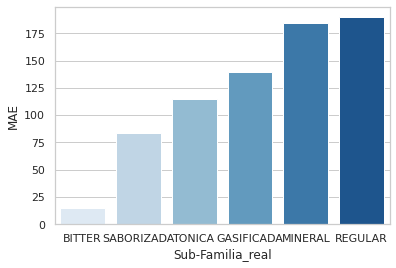

In [ ]:
sns.barplot(x = 'Sub-Familia_real',
            y = 'MAE',
            data = df_subfamilia_mae,palette = "Blues")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



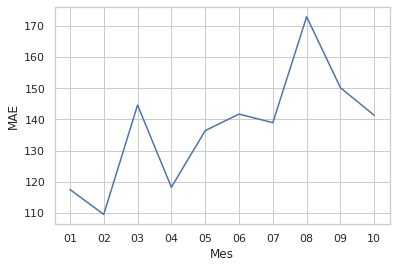

In [ ]:
df_mes_mae = merge_dfs.groupby(['Mes'],as_index = False)['MAE','Cantidad_real','Cantidad_ppto'].mean().round(decimals = 2)
sns.lineplot(x="Mes", y="MAE",
             data=df_mes_mae)

## Ahora empleando la formula de MAPE, ¿cuáles son los grupos y SKUs con mayor/menor MAPE?

In [ ]:
df_subfamilia_mape = merge_dfs.groupby(['Sub-Familia_real'],as_index = False)['MAPE','MAE','Cantidad_real','Cantidad_ppto'].mean().round(decimals = 2)
df_subfamilia_mape.sort_values(by = 'MAPE', inplace = True)
df_subfamilia_mape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sub-Familia_real,MAPE,MAE,Cantidad_real,Cantidad_ppto
0,BITTER,2.89,14.61,11.1,9.82
1,GASIFICADA,7.5,139.46,63.12,117.52
5,TONICA,8.21,114.39,55.92,73.52
2,MINERAL,9.45,184.43,81.25,156.73
3,REGULAR,10.08,189.73,65.46,174.13
4,SABORIZADA,10.49,83.75,38.46,60.02


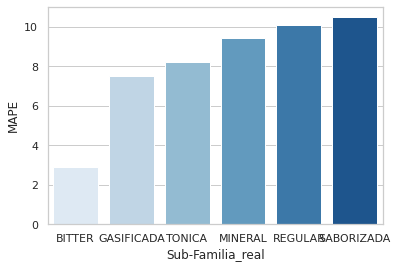

In [ ]:
sns.barplot(x = 'Sub-Familia_real',
            y = 'MAPE',
            data = df_subfamilia_mape,palette = "Blues")

In [ ]:
df_bias_sku = merge_dfs.groupby(['Código'],as_index = False)['MAPE','MAE','Cantidad_real','Cantidad_ppto'].mean().round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# Top MAE
mae_sku = df_bias_sku.sort_values(by=['MAE'], kind='mergesort',ascending=False)
mae_sku_top = mae_sku.head()
mae_sku_top.to_excel('mae_sku_top.xlsx')

In [ ]:
# Top MAPE
mape_sku = df_bias_sku.sort_values(by=['MAPE'], kind='mergesort',ascending=False)
mape_sku_top = mape_sku.head()
mape_sku_top.to_excel('mape_sku_top.xlsx')